Akil Bhuiyan <br>
Professor Matthew Fried <br>
CSCI 381 (Data Analytics) <br>
Project 2

[Project2.ppt](https://drive.google.com/open?id=1TAU_uYYpABEWK_8TMbaP9SlfPECMgOh2)

# Overview
Data description “e-shop clothing 2008”:

Why we pick this dataset?

Our hypothesis: We predict that if the demand for the product is high , the product price will be higher than the average price. If the price is higher, one will be put down and if the price is lower than the average, and then we will indicate it. 





Variables:

1. YEAR (2008)


2. MONTH -> from April (4) to August (8)


3. DAY -> day number of the month


4. ORDER -> sequence of clicks during one session


5. COUNTRY -> variable indicating the country of origin of the IP address with the following categories:

  Australia, Austria, Belgium, British Virgin Islands, Cayman Islands, Christmas Island, Croatia, Cyprus, Czech Republic, Denmark, Estonia, unidentified, Faroe Islands, Finland, France, Germany, Greece, Hungary, Iceland, India, Ireland, Italy, Latvia, Lithuania, Luxembourg, Mexico, Netherlands, Norway, Poland, Portugal, Romania, Russia, San Marino, Slovakia, Slovenia, Spain, Sweden, Switzerland, Ukraine, United Arab Emirates, United Kingdom, and USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)

6. SESSION ID -> variable indicating session id (short record)

  A session ID is a unique number that a Web site's server assigns a specific user for the duration of that user's visit (session). The session ID can be stored as a cookie, form field, or URL (Uniform Resource Locator). Some Web servers generate session IDs by simply incrementing static numbers.
[link](https://www.techtarget.com/searchsoftwarequality/definition/session-ID#:~:text=A%20session%20ID%20is%20a,by%20simply%20incrementing%20static%20numbers)


7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
  1. trousers
  2. skirts
  3. blouses
  4. sale


8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product (217 products)


9. COLOUR -> colour of product.

  1. beige
  2. black
  3. blue
  4. brown
  5. burgundy
  6. gray
  7. green
  8. navy blue
  9. of many colors
  10. olive
  11. pink
  12. red
  13. violet
  14. white


10. LOCATION -> photo location on the page, the screen has been divided into six parts:

  1. top left
  2. top in the middle
  3. top right
  4. bottom left
  5. bottom in the middle
  6. bottom right


11. MODEL PHOTOGRAPHY -> variable with two categories: 

  1. en face
  2. profile


12. PRICE -> price in US dollars


13. PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category

  1. yes
  2. no

14. PAGE -> page number within the e-store website (from 1 to 5)

In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First, read the data into python using pandas, read csv file.
dataframe=pd.read_csv("https://raw.githubusercontent.com/iakil/CSCI381_DataAnalytics/main/Data/e-shop_clothing_2008.csv")

# updating some of the attribute name to a better one 
dataframe.rename(columns={'page 1 (main category)': 'ProductCategory', 'page 2 (clothing model)': 'ClothingModel' , 'colour' : 'Color', 'model photography' : 'ModelPhoto' },inplace=True)     

#drop some unnecessary datas
dataframe=dataframe.drop(["page","location","ModelPhoto"],axis=1)
dataframe

,year,month,day,order,country,session ID,ProductCategory,ClothingModel,Color,price,price 2
0,2008,4,1,1,29,1,1,A13,1,28,2
1,2008,4,1,2,29,1,1,A16,1,33,2
2,2008,4,1,3,29,1,2,B4,10,52,1
3,2008,4,1,4,29,1,2,B17,6,38,2
4,2008,4,1,5,29,1,2,B8,4,52,1
...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,67,1
165470,2008,8,13,1,9,24025,1,A11,3,62,1
165471,2008,8,13,1,34,24026,1,A2,3,43,2
165472,2008,8,13,2,34,24026,3,C2,12,43,1


delete unnecessary columns(datas) : page,location, and ModelPhoto. 

In [9]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
year,165474.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
month,165474.0,5.585887,1.328160,4.0,4.0,5.0,7.0,8.0
day,165474.0,14.524554,8.830374,1.0,7.0,14.0,22.0,31.0
order,165474.0,9.817476,13.478411,1.0,2.0,6.0,12.0,195.0
country,165474.0,26.952621,7.150691,1.0,29.0,29.0,29.0,47.0
session ID,165474.0,12058.417056,7008.418903,1.0,5931.0,11967.5,18219.0,24026.0
ProductCategory,165474.0,2.400842,1.144420,1.0,1.0,2.0,3.0,4.0
Color,165474.0,6.227655,4.235606,1.0,3.0,4.0,9.0,14.0
price,165474.0,43.802507,12.548131,18.0,33.0,43.0,52.0,82.0
price 2,165474.0,1.488167,0.499861,1.0,1.0,1.0,2.0,2.0


In [10]:
#Identify the Data Types
df_info = pd.DataFrame(dataframe.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = dataframe.nunique()

#check missing values for each column
df_info['MissingValues']=dataframe.isnull().sum()

# Identify the count for each variable
df_info['Count']=dataframe.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(dataframe==0).sum()

# how many '?' values
df_info['?']=(dataframe=='?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?
year,int64,1,0,165474,0,0
month,int64,5,0,165474,0,0
day,int64,31,0,165474,0,0
order,int64,195,0,165474,0,0
country,int64,47,0,165474,0,0
session ID,int64,24026,0,165474,0,0
ProductCategory,int64,4,0,165474,0,0
ClothingModel,object,217,0,165474,0,0
Color,int64,14,0,165474,0,0
price,int64,20,0,165474,0,0


All the data seems to be from 2008 , so there is really no use of using year as it's not giving us any information. However, from the nunique output we could see that there are several distinct days and months which could give us an insight as we dig more down into data.

In [11]:
dataframe=dataframe.drop('year',axis=1)
dataframe.head()

,month,day,order,country,session ID,ProductCategory,ClothingModel,Color,price,price 2
0,4,1,1,29,1,1,A13,1,28,2
1,4,1,2,29,1,1,A16,1,33,2
2,4,1,3,29,1,2,B4,10,52,1
3,4,1,4,29,1,2,B17,6,38,2
4,4,1,5,29,1,2,B8,4,52,1


# Corrlation of attributes

In [12]:
corr  = dataframe.corr()
corr

,month,day,order,country,session ID,ProductCategory,Color,price,price 2
month,1.000000,-0.075098,0.026093,0.065502,0.970961,0.017557,-0.035279,0.012700,-0.014658
day,-0.075098,1.000000,-0.021744,0.011551,0.161369,-0.001251,0.005313,-0.002818,0.004254
order,0.026093,-0.021744,1.000000,-0.064709,0.021829,0.151693,0.046427,-0.064779,0.000772
country,0.065502,0.011551,-0.064709,1.000000,0.065869,0.132817,0.009789,-0.045345,-0.017536
session ID,0.970961,0.161369,0.021829,0.065869,1.000000,0.016123,-0.032034,0.011669,-0.012742
ProductCategory,0.017557,-0.001251,0.151693,0.132817,0.016123,1.000000,0.230577,-0.364791,-0.137944
Color,-0.035279,0.005313,0.046427,0.009789,-0.032034,0.230577,1.000000,-0.091159,-0.080147
price,0.012700,-0.002818,-0.064779,-0.045345,0.011669,-0.364791,-0.091159,1.000000,-0.743633
price 2,-0.014658,0.004254,0.000772,-0.017536,-0.012742,-0.137944,-0.080147,-0.743633,1.000000




Strongest correlation we see are the following:

session_ID and Month : 0.970961

Color and ProductCategory : 0.230577 

session_ID and day : 0.161369
 



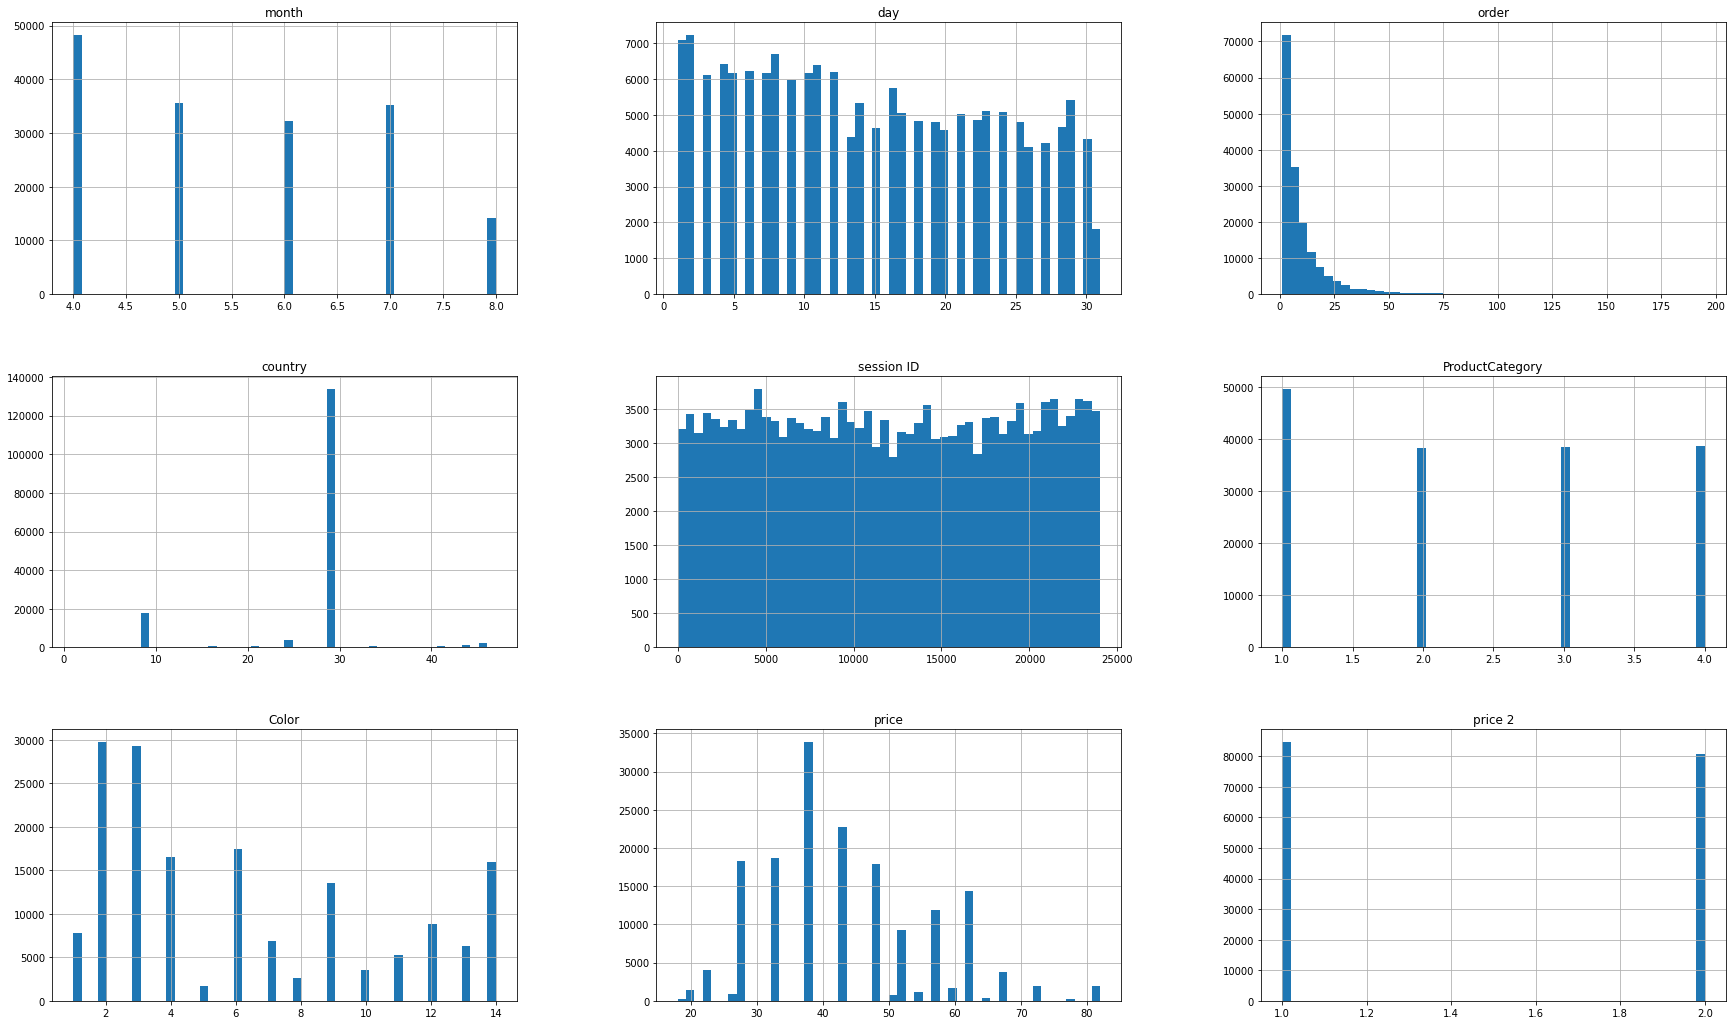

In [13]:
dataframe.hist(bins=50,figsize=(30,18))
plt.show()

<AxesSubplot:>

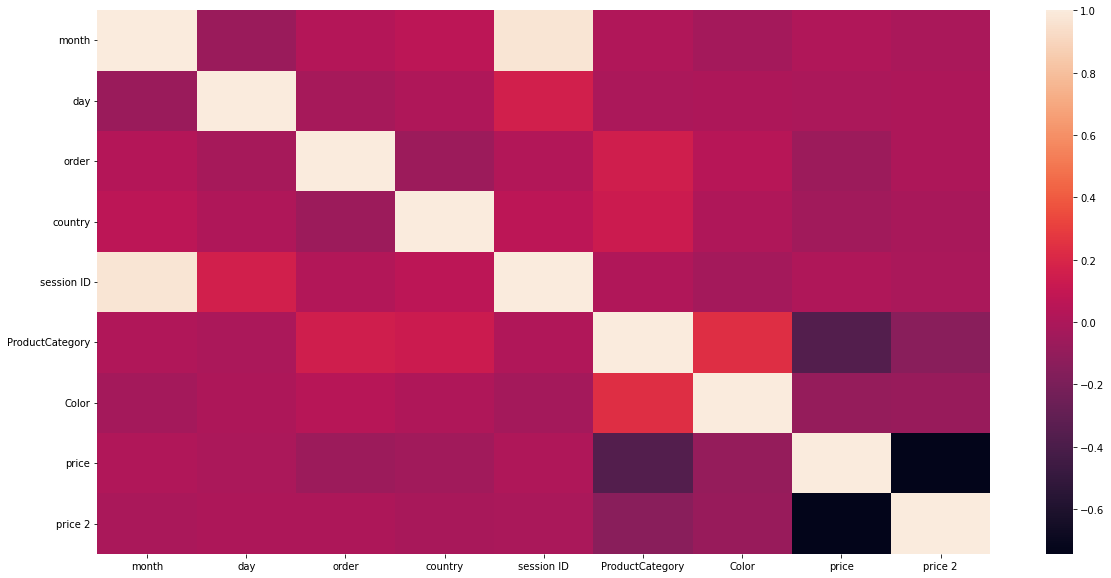

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data = corr)

In [15]:
countries=dataframe['country']
array=[]
for i in countries:
  array.append(i)
countries=pd.DataFrame(array).value_counts()
df=dataframe
df=df[df['country']<42]
x=df['country']
country_name_list=[
'Australia',
'Austria',
'Belgium',
'British Virgin Islands',
'Cayman Islands',
'Christmas Island',
'Croatia',
'Cyprus',
'Czech Republic',
'Denmark',
'Estonia',
'unidentified',
'Faroe Islands',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Iceland',
'India',
'Ireland',
'Italy',
'Latvia',
'Lithuania',
'Luxembourg',
'Mexico',
'Netherlands',
'Norway',
'Poland',
'Portugal',
'Romania',
'Russia',
'San Marino',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
"Switzerland",
"Ukraine",
"United Arab Emirates",
"United Kingdom",
'USA']


country_numbers=np.array(range(1,43))
for i in range(len(country_name_list)):
  x.replace(i+1,country_name_list[i],inplace=True)
type(x)
countries_order=pd.DataFrame(x)
target=pd.DataFrame(countries_order['country'].value_counts())
target.describe()








/var/folders/l4/3jrpbdxs1d3d0d9grx88k7s00000gn/T/ipykernel_38871/464510420.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace(i+1,country_name_list[i],inplace=True)


,country
count,41.000000
mean,3935.439024
std,21008.692292
min,1.000000
25%,5.000000
50%,49.000000
75%,163.000000
max,133963.000000


Looking at the statistic , it is worth to mention few facts which make some new insight about the data. 
The minimum number of clicks for a country is 1 and maximum number of clicks is 133963. 

Furthermore by considerring minimum and maximum clicks from the the above frame , we see a big standard deviation which shows the big gap among different countries. 

# Top 3 Countries Order


In [16]:
#find out how many clicks per country.
Click_per_country=pd.DataFrame(countries_order.value_counts())
Click_per_country

,0
country,
Poland,133963
Czech Republic,18003
Lithuania,4091
Germany,834
Ireland,811
Slovakia,716
United Kingdom,684
Belgium,256
Netherlands,227


Poland : 133963 clicks

Czech Republic : 18003 clikcs

Lithuania : 4091 clicks

100194
65280


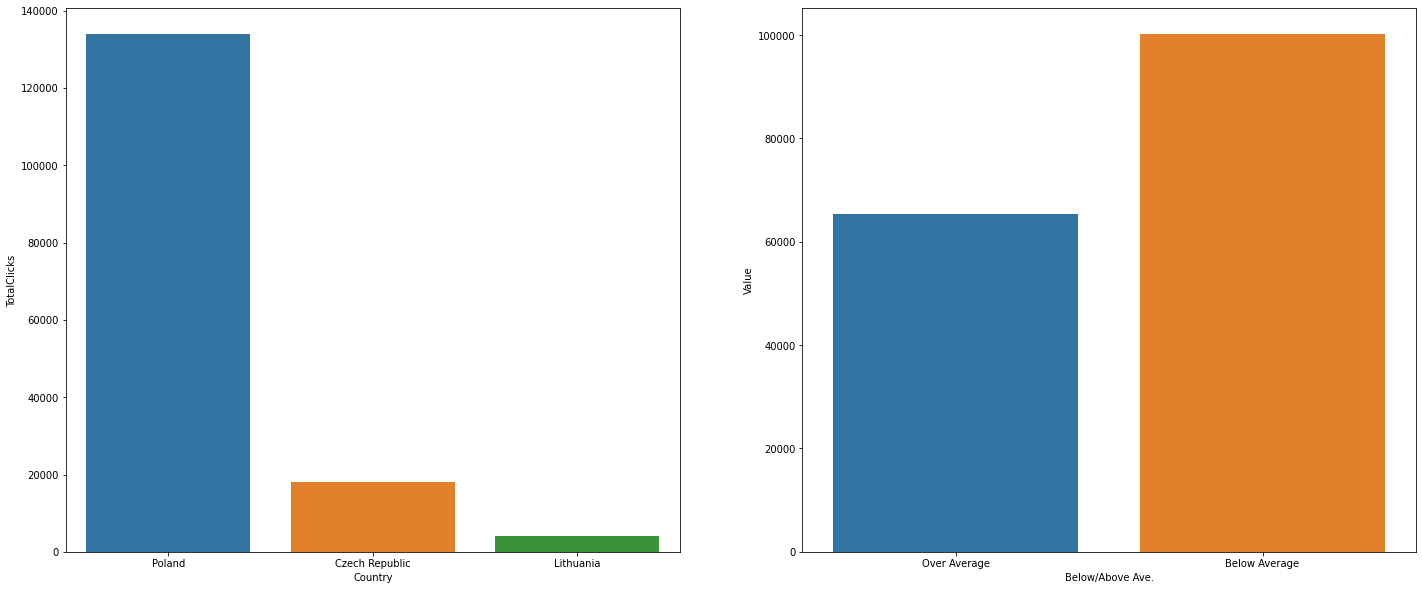

In [17]:
Top3Country=pd.DataFrame(countries_order.value_counts())
Top3Country.rename(columns={0:"TotalClicks"},inplace=True)
Top3Country=Top3Country.TotalClicks[Top3Country['TotalClicks']>834]
TotalClickList=Top3Country.to_numpy()
Top3_Names=["Poland","Czech Republic","Lithuania"]
country_click_dictionary1={}
for i in range(len(Top3_Names)):
    country_click_dictionary1[Top3_Names[i]]=TotalClickList[i]
topCountryFrame=pd.DataFrame(pd.DataFrame(country_click_dictionary1.items(), columns=['Country', 'TotalClicks']))


mean_value=dataframe['price'].mean()
l1=dataframe['price'].where(dataframe['price']<mean_value)
l2=dataframe['price'].where(dataframe['price']>mean_value)


l1=l1.dropna()
l2=l2.dropna()

l1=np.array(l1)
l2=np.array(l2)

l1=len(l1)
l2=len(l2)

print(l1)
print(l2)

dictionaryPrice={"Over Average":l2,"Below Average":l1}
priceFrame=pd.DataFrame(pd.DataFrame(dictionaryPrice.items(), columns=['Below/Above Ave.', 'Value']))









plt.subplot(1,2,1)
sns.barplot(x=topCountryFrame['Country'],y=topCountryFrame['TotalClicks'],data=topCountryFrame)


plt.subplot(1,2,2)
sns.barplot(x=priceFrame['Below/Above Ave.'],y=priceFrame['Value'],data=priceFrame)



plt.gcf().set_size_inches(10, 10)
plt.subplots_adjust(right=2)
plt.show()



In [18]:
from numpy.core.arrayprint import array2string
# Group by session ID get the order(number of clicks)
a=dataframe.groupby('session ID')['order'].apply(list).values
frameSessions=pd.DataFrame(a)
frameSessions.rename(columns={0:'Number of click per session'},inplace=True)

df_copy=dataframe
expectedColumn=df_copy['session ID']
sID=pd.DataFrame(expectedColumn)['session ID']
sID=sID.to_numpy()
sID=np.unique(sID)
sID
# expected_column=pd.DataFrame(sID)[0]
# df_copy.rename(columns={0:'Unique_Session'},inplace=True)

array([    1,     2,     3, ..., 24024, 24025, 24026])

This tables shows the interact/number of clicks a user does per session , he has came on to the e-shop to check out different output 

# 3 Click Interest Rule
We are assuming that if the user has click at least 3 times, she has some interest about some item. So , we try to look make a new category to see how many users are interested in the e-shop .

In [19]:
interested=frameSessions['Number of click per session'].to_numpy()
interest_list=pd.Series([]) 
# df_copy=dataframe
for i in range(len(interested)): 
    l=len(interested[i])
    if 3 <= l: 
        interest_list[i]="Interested"
    else:
      interest_list[i]="NoTInterested"
frameSessions.insert(1,"Customer Interested",interest_list)
# frameSessions=frameSessions.join(expected_column)
frameSessions.rename(columns={0:"Unique Session ID"},inplace=True)
# expectedColumn=df_copy['']

frameSessions.head()


/var/folders/l4/3jrpbdxs1d3d0d9grx88k7s00000gn/T/ipykernel_38871/2234695325.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  interest_list=pd.Series([])


,Number of click per session,Customer Interested
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",Interested
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",Interested
2,"[1, 2, 3, 4, 5, 6]",Interested
3,"[1, 2, 3, 4]",Interested
4,[1],NoTInterested


In [20]:
interest_output=frameSessions['Customer Interested'].value_counts()
interest=pd.DataFrame(interest_output)
InterestPercentage=frameSessions.shape
numberInterest=interest['Customer Interested'][0]
InterestPercentage=numberInterest/InterestPercentage[0]
InterestPercentage = InterestPercentage * 100
# print(f'{InterestPercentage}%')
Not_Interest=interest['Customer Interested'][1]
# Not_Interest=Not_Interest/numberInterest
Not_Interest=Not_Interest/frameSessions.shape[0]
Not_Interest=Not_Interest * 100

print(f'{InterestPercentage} %')
print(f'{Not_Interest} %')

65.19603762590526 %
34.80396237409473 %


After the calculation , we could see that 65% of the session visit would be considerred as "interested visit" and 34% of visits are from "Not Interested" customers visiting. 

/var/folders/l4/3jrpbdxs1d3d0d9grx88k7s00000gn/T/ipykernel_38871/2753134616.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Type_new = pd.Series([])


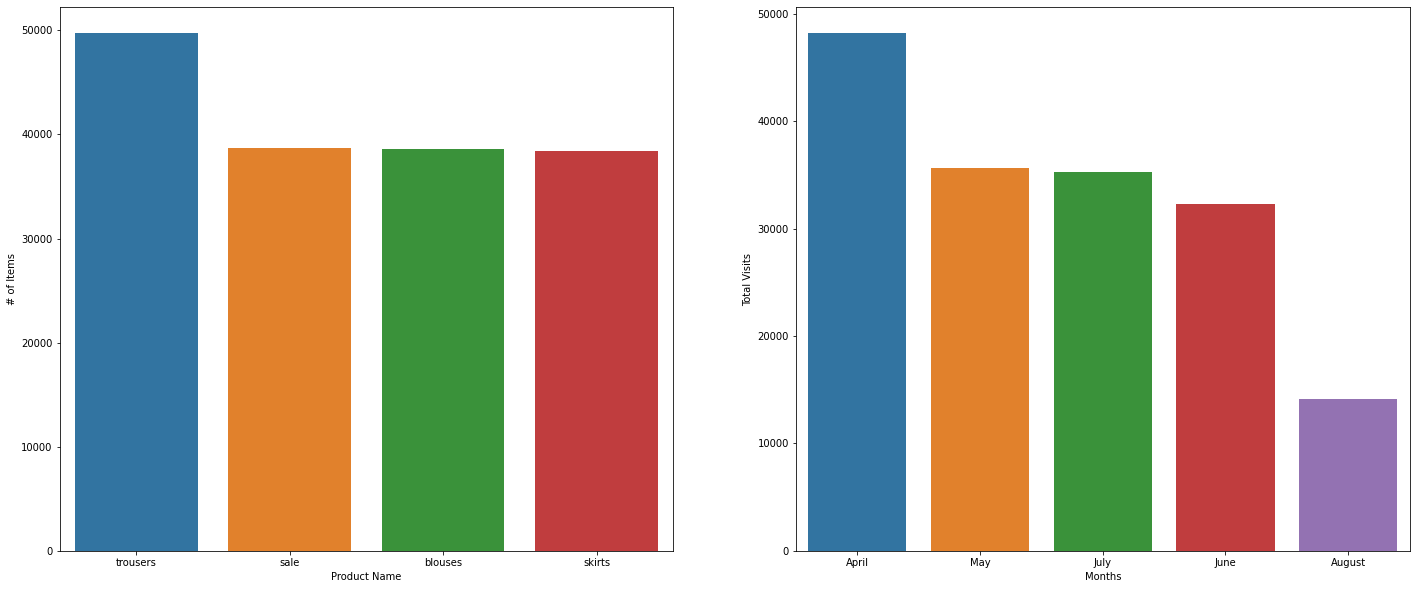

In [21]:
import matplotlib.pyplot as plt

frame=dataframe['month'].value_counts()
month_frame=pd.DataFrame(frame)
month_name=['April','May','July','June','August']
month_list=month_frame['month'].to_numpy()
month_dictionary={}
for i in range(len(month_list)):
  month_dictionary[month_name[i]]=month_list[i]
month_dictionary
month_frame=pd.DataFrame(pd.DataFrame(month_dictionary.items(), columns=['Months', 'Total Visits']))

new_column=dataframe['ProductCategory']
product_dictionary={}
list_category_name=['trousers','sale','blouses','skirts']
item_code=[1,4,3,2]
frame_categoryName=pd.DataFrame(new_column.value_counts())
f=frame_categoryName['ProductCategory'].to_numpy()
for i in range(len(f)):
  product_dictionary[list_category_name[i]]=f[i]
category_frame=pd.DataFrame(pd.DataFrame(product_dictionary.items(),columns=['Product Name','# of Items']))

Type_new = pd.Series([])
item_code=pd.DataFrame(item_code)
item_code.rename(columns={0:'Item Code'},inplace=True)
expected_column=item_code['Item Code']
category_frame=category_frame.join(expected_column)

plt.subplot(1,2,1)
sns.barplot(x='Product Name',y='# of Items',data=category_frame)

plt.subplot(1,2,2)
sns.barplot(x=month_frame['Months'],y=month_frame['Total Visits'])


plt.gcf().set_size_inches(10, 10)
plt.subplots_adjust(right=2)
plt.show()


# Data  Preparation

## Dropping The Clothing Model 

In [22]:
dataframe=dataframe.drop('ClothingModel',axis=1)

## Changing 2's in 'price 2' into 0 to fit logistic regression

In [23]:
df=dataframe
df.loc[df['price 2']==2,['price 2']]=0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve

target=dataframe['price 2'].copy()
features=dataframe.drop(['price 2'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=0)

lm=LogisticRegression()
result1=lm.fit(X_train,y_train)
y_predic=lm.predict(X_test)


print(classification_report(y_test,y_predic,digits=7))

              precision    recall  f1-score   support

           0  0.8215401 0.8483977 0.8347529     20158
           1  0.8513040 0.8248550 0.8378708     21211

    accuracy                      0.8363267     41369
   macro avg  0.8364220 0.8366263 0.8363119     41369
weighted avg  0.8368009 0.8363267 0.8363516     41369



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion Matrix


<AxesSubplot:>

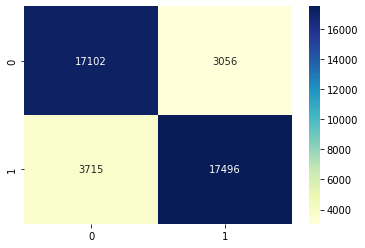

In [25]:
cnf_matrix=confusion_matrix(y_test,y_predic)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')

0: NoT higher than average  &     1: Yes-Higher than Average

True positive: 17,496

True Negative: 17,102

False Negative: 3056

False Positive:3715






## ROC Curve

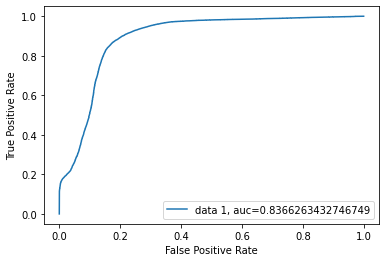

In [26]:
from sklearn import metrics
fpr,tpr, _ =roc_curve(y_test,lm.predict_proba(X_test)[:,1])
auc=roc_auc_score(y_test,y_predic)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###  Least Squares Method - Model2

In [27]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import statsmodels.api as sm
 
# make a model using least square method / SELECTLBest Automate the chi square test 
test=SelectKBest(score_func=chi2,k=5)
fit=test.fit(features,target)
feature_score =pd.DataFrame()
for i in range(features.shape[1]):
  new = pd.DataFrame({'Features':features.columns[i],
                      'Score': fit.scores_[i]},index=[i])
  feature_score=pd.concat([feature_score, new])




result=sm.OLS(y_train,X_train).fit()
r=result.predict()

print(result.summary())



print(feature_score)
# print(classification_report(y_test,r,digits=7))






                                 OLS Regression Results                                
Dep. Variable:                price 2   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                          1.098e+05
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        00:25:00   Log-Likelihood:                         -4886.3
No. Observations:              124105   AIC:                                      9789.
Df Residuals:                  124097   BIC:                                      9866.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Sometimes the statistical softwares display the p value as 0, depending on the settings concerning the numbers of digits to be displayed.
Anyway, if your software displays a p values of 0, it means the null hypothesis is rejected and your test is statistically significant (for example the differences between your groups are significant
[link](https://www.researchgate.net/post/p_value_of_0000#:~:text=Anyway%2C%20if%20your%20software%20displays,between%20your%20groups%20are%20significant/)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
r=knn.fit(X_train,y_train)
a=r.predict(X_test)
print(classification_report(y_test,a,digits=7))

              precision    recall  f1-score   support

           0  0.9017280 0.9267785 0.9140816     20158
           1  0.9285265 0.9040121 0.9161053     21211

    accuracy                      0.9151055     41369
   macro avg  0.9151272 0.9153953 0.9150935     41369
weighted avg  0.9154683 0.9151055 0.9151192     41369



# Tree Classification Model/decision tree

<AxesSubplot:>

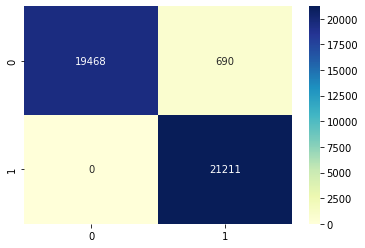

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred_en)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')

In [30]:
tp=((y_test==1) & (y_test == y_pred_en)).sum()
tn=((y_test==0) & (y_test == y_pred_en)).sum()
fp=((y_test==0) & (y_test != y_pred_en)).sum()
fn=((y_test==1) & (y_test != y_pred_en)).sum()

accuracy2= (tp+tn)/(tp+tn+fp+fn)
precision2=(tp)/(tp+fp)



print("Accuracy: ",accuracy2)
print("Precision: ",precision2)

Accuracy:  0.9833208441103242
Precision:  0.9684945892881603


Conclusion:

In this project, I predict that if the demand for the product is high, the product price will be higher than the average price. If the price were higher, the number 1 would be put down, and if the price was lower then the average. The data set had 165474 records and 14 attributes. We dropped three columns (location, ModelPhoto, and page). And we described all columns’ count, mean, std, min, 25%, 50%, 75%, and max. And then we identify the data type, unique values, missing values, count, zero values, and question mark. However, there has no missing values, zero values, and question mark. Also, we deleted the year because of all data from 2008. We used correlation and then found out which one was the strongest correlation. We found out how many clicks per country, and then chose only the top 3. It was Poland, the Czech Republic, and Lithuania. Most customers bought trousers. It was almost 50,000. And there had almost 50,000 visitors in April. In Data preparation, we dropped the ClothingModel because it was not important data.  We changed 2 to 0 in price 2 for logistic regression.  In the first model, we found out the precision, recall, and f1-score. It was 84%. And confusion matrix showed true positive 17,496, true negative 17,102, false negative 3056, and false positive 3715. Moreover, we used the least squares method in model 2, but we got all 0 p-values. Furthermore, we used the KNN model in model 3. There had 92%, so there had improved. Then we made another model using the tree classification method which gave an impressive 0.98 accuracy and 0.96 precision. We will choose the tree classification model since it is the most accurate model to use for this dataset

